<a href="https://colab.research.google.com/github/shahad-jeza/kaust_training/blob/main/summer_basic_code/GANs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Question 🚀

In [1]:


import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Task 1: Data Preparation (5 minutes)
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

# Task 2: Implement Generator and Discriminator (25 minutes)
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()
        # TODO: Implement the generator network
        # Input: latent vector, Output: 3x32x32 image

    def forward(self, z):
        # TODO: Implement forward pass
        pass

class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        # TODO: Implement the discriminator network
        # Input: 3x32x32 image, Output: single value

    def forward(self, img):
        # TODO: Implement forward pass
        pass

# Task 3: Loss Function and Training (20 minutes)
def train_gan(generator, discriminator, train_loader, num_epochs, latent_dim):
    # TODO: Implement GAN training loop
    # Use Binary Cross Entropy loss
    # Train both generator and discriminator
    pass

# Task 4: Train and Visualize (10 minutes)
latent_dim = 100
generator = Generator(latent_dim)
discriminator = Discriminator()

train_gan(generator, discriminator, train_loader, num_epochs=5, latent_dim=latent_dim)

# TODO: Generate and visualize some fake images
# TODO: Plot training progress (optional)

100%|██████████| 170498071/170498071 [00:13<00:00, 12849160.85it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data




---



# Solution

In [2]:
import torch
import torch.nn as nn
import torch.optim as optim
import torchvision
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Task 1: Data Preparation
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))
])

train_dataset = torchvision.datasets.CIFAR10(root='./data', train=True, download=True, transform=transform)
train_loader = DataLoader(train_dataset, batch_size=64, shuffle=True)

Files already downloaded and verified


In [3]:
# Task 2: Implement Generator and Discriminator
class Generator(nn.Module):
    def __init__(self, latent_dim):
        super(Generator, self).__init__()
        # TODO: Implement the generator network
        # Input: latent vector, Output: 3x32x32 image
        self.gen = nn.Sequential(
            nn.Linear(latent_dim, 256),
            nn.ReLU(),
            nn.Linear(256, 512),
            nn.ReLU(),
            nn.Linear(512, 1024),
            nn.ReLU(),
            nn.Linear(1024, 3*32*32),
            nn.Tanh()
        )

    def forward(self, z):
        # TODO: Implement forward pass
        img = self.gen(z)
        img = img.view(img.size(0), 3, 32, 32)
        return img


class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()
        # TODO: Implement the discriminator network
        # Input: 3x32x32 image, Output: single value
        self.desc = nn.Sequential(
            nn.Linear(3*32*32, 512),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(512, 256),
            nn.LeakyReLU(0.2, inplace=True),
            nn.Linear(256, 1),
            nn.Sigmoid()

            )

    def forward(self, img):
        img_flat = img.view(img.size(0), -1)
        validity = self.desc(img_flat)
        return validity

In [4]:
# Task 3: Loss Function and Training (
def train_gan(generator, discriminator, train_loader, num_epochs, latent_dim):
    # TODO: Implement GAN training loop
    # Use Binary Cross Entropy loss
    # Train both generator and discriminator
    criterion = nn.BCELoss()
    optimizer_G = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
    optimizer_D = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

    device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
    generator.to(device)
    discriminator.to(device)

    for epoch in range(num_epochs):
        for i, (real_imgs, _) in enumerate(train_loader):
            batch_size = real_imgs.size(0)
            real_imgs = real_imgs.to(device)

            # Ground truths
            valid = torch.ones(batch_size, 1).to(device)
            fake = torch.zeros(batch_size, 1).to(device)

            # Train Generator
            optimizer_G.zero_grad()
            z = torch.randn(batch_size, latent_dim).to(device)
            gen_imgs = generator(z)
            g_loss = criterion(discriminator(gen_imgs), valid)
            g_loss.backward()
            optimizer_G.step()

            # Train Discriminator
            optimizer_D.zero_grad()
            real_loss = criterion(discriminator(real_imgs), valid)
            fake_loss = criterion(discriminator(gen_imgs.detach()), fake)
            d_loss = (real_loss + fake_loss) / 2
            d_loss.backward()
            optimizer_D.step()

        print(f"Epoch [{epoch+1}/{num_epochs}] D loss: {d_loss.item():.4f}, G loss: {g_loss.item():.4f}")





In [5]:
# Task 4: Train and Visualize
latent_dim = 100
generator = Generator(latent_dim)
discriminator = Discriminator()

train_gan(generator, discriminator, train_loader, num_epochs=30, latent_dim=latent_dim)



Epoch [1/30] D loss: 0.2062, G loss: 13.6405
Epoch [2/30] D loss: 0.2642, G loss: 1.1308
Epoch [3/30] D loss: 0.2363, G loss: 1.2054
Epoch [4/30] D loss: 0.3852, G loss: 1.5514
Epoch [5/30] D loss: 0.1873, G loss: 2.3796
Epoch [6/30] D loss: 0.0955, G loss: 2.2046
Epoch [7/30] D loss: 0.3832, G loss: 1.7128
Epoch [8/30] D loss: 0.0521, G loss: 2.3572
Epoch [9/30] D loss: 0.2121, G loss: 1.8026
Epoch [10/30] D loss: 0.3783, G loss: 1.6829
Epoch [11/30] D loss: 0.1428, G loss: 2.2122
Epoch [12/30] D loss: 0.3915, G loss: 2.4058
Epoch [13/30] D loss: 0.2465, G loss: 1.8665
Epoch [14/30] D loss: 0.7129, G loss: 1.3853
Epoch [15/30] D loss: 0.2687, G loss: 2.4512
Epoch [16/30] D loss: 0.3292, G loss: 1.6665
Epoch [17/30] D loss: 0.4408, G loss: 1.9054
Epoch [18/30] D loss: 0.4730, G loss: 1.5296
Epoch [19/30] D loss: 0.5052, G loss: 1.2761
Epoch [20/30] D loss: 0.6894, G loss: 1.0991
Epoch [21/30] D loss: 0.4269, G loss: 1.4388
Epoch [22/30] D loss: 0.5997, G loss: 1.2112
Epoch [23/30] D lo

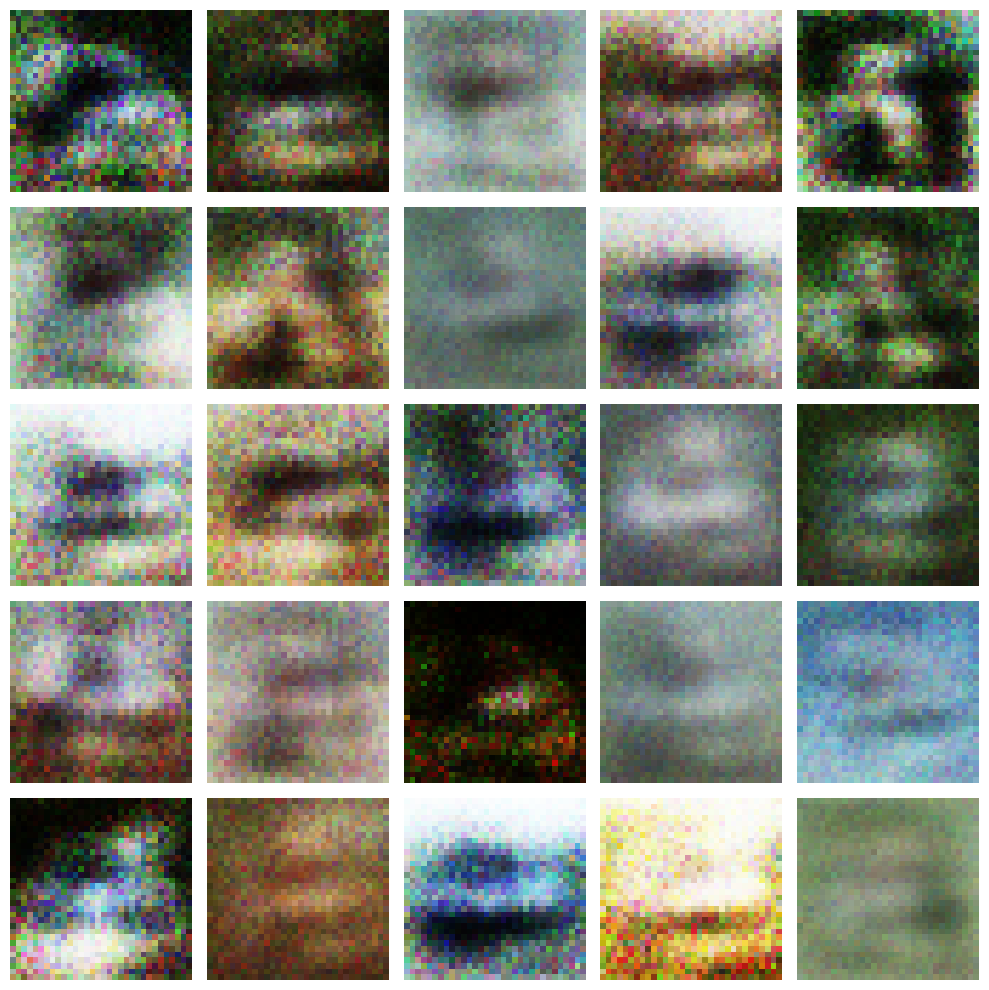

In [8]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu") # Get the device
# Generate and visualize fake images
def generate_and_visualize(generator, latent_dim, num_images=25):
    z = torch.randn(num_images, latent_dim).to(device)
    gen_imgs = generator(z).detach().cpu()

    fig, axes = plt.subplots(5, 5, figsize=(10, 10))
    for i, ax in enumerate(axes.flat):
        img = gen_imgs[i].numpy().transpose((1, 2, 0)) * 0.5 + 0.5
        ax.imshow(img)
        ax.axis('off')
    plt.tight_layout()
    plt.show()

generate_and_visualize(generator, latent_dim)